<a href="https://colab.research.google.com/github/nhmt123/2001230992_NguyenHoMinhTrong_TH_TTNT_Tuan3/blob/main/Alpha-Beta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- KẾT QUẢ TÔ MÀU TÍNH TOÁN ---
Đỉnh  A  =  Red
Đỉnh  B  =  Blue
Đỉnh  C  =  Yellow
Đỉnh  D  =  Green
Đỉnh  E  =  Blue
Đỉnh  F  =  Red
Đỉnh  G  =  Yellow

Tổng số màu đã sử dụng: 4


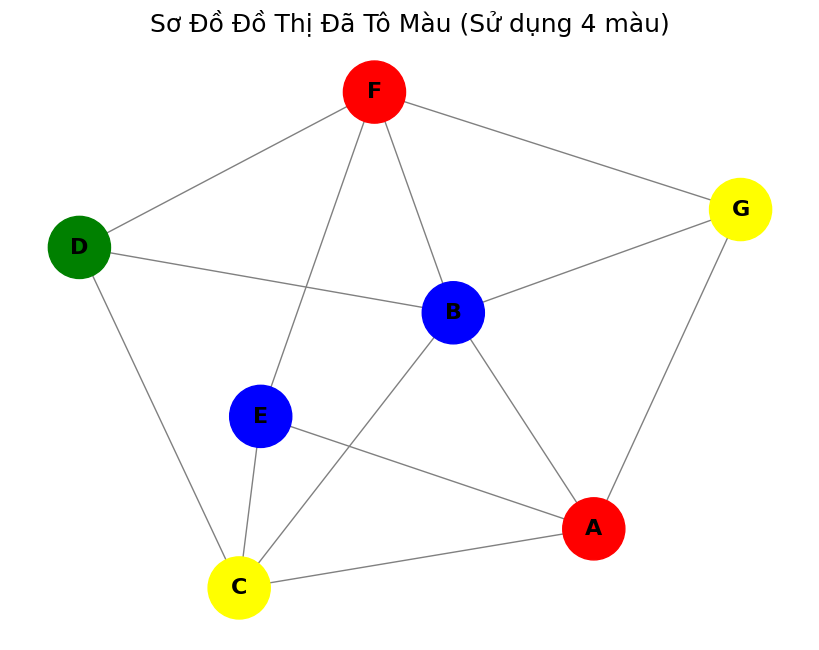

In [ ]:
# Bài toán tô màu
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G = [[ 0, 1, 1, 0, 1, 0, 1],
     [ 1, 0, 1, 1, 0, 1, 1],
     [ 1, 1, 0, 1, 1, 0, 0],
     [ 0, 1, 1, 0, 0, 1, 0],
     [ 1, 0, 1, 0, 0, 1, 0],
     [ 0, 1, 0, 1, 1, 0, 1],
     [ 1, 1, 0, 0, 0, 1, 0]]

nodes = "ABCDEFG"
N = len(G)

t_ = {}
for i in range(N):
    t_[nodes[i]] = i

degree = [] # Lưu trữ bậc của mỗi đỉnh.
for i in range(N):
    degree.append(sum(G[i]))

colorDict = {}
for i in range(N):
    colorDict[nodes[i]]=["Blue","Red","Yellow","Green"]

# Sắp xếp các đỉnh theo thứ tự bậc
sortedNode= [] # Danh sách tên đỉnh theo thứ tự đã sắp xếp.
indeks = [] # Danh sách các chỉ số của đỉnh đã được chọn (để không chọn lại).

for i in range(len(degree)):
    _max = 0
    j = 0
    for j in range(len(degree)):
        if j not in indeks:
            if degree[j] > _max:
                _max = degree[j]
                idx = j
    indeks.append(idx)
    sortedNode.append(nodes[idx])

theSolution={} # Khởi tạo từ điển để lưu trữ kết quả cuối cùng: {'B': 'Blue', 'A': 'Red', ...}.
for n in sortedNode:
    setTheColor = colorDict[n]
    theSolution[n] = setTheColor[0]
    adjacentNode = G[t_[n]] # Lấy hàng trong G của đỉnh n
    for j in range(len(adjacentNode)):
        if adjacentNode[j]==1 and (setTheColor[0] in colorDict[nodes[j]]):
            colorDict[nodes[j]].remove(setTheColor[0])

print("--- KẾT QUẢ TÔ MÀU TÍNH TOÁN ---")
for t,w in sorted(theSolution.items()):
    print("Đỉnh ",t," = ",w)

G_nx = nx.from_numpy_array(np.array(G)) # Chuyển ma trận G sang đối tượng đồ thị của networkx để có thể vẽ

mapping = {i: name for i, name in enumerate(nodes)} # Tạo từ điển ánh xạ chỉ số
G_nx = nx.relabel_nodes(G_nx, mapping) # Gán lại nhãn đỉnh trong đối tượng đồ thị networkx bằng tên (A, B, C...)

color_map_list = [theSolution[node] for node in G_nx.nodes()] # Tạo danh sách các màu theo đúng thứ tự các đỉnh trong đối tượng G_nx
used_colors = set(theSolution.values())

plt.figure(figsize=(8, 6))

pos = nx.spring_layout(G_nx, seed=42)

nx.draw(G_nx, pos,
        with_labels=True,
        node_color=color_map_list,
        node_size=2000,
        font_size=16,
        font_weight='bold',
        edge_color='gray')

plt.title(f"Sơ Đồ Đồ Thị Đã Tô Màu (Sử dụng {len(used_colors)} màu)", fontsize=18)
print(f"\nTổng số màu đã sử dụng: {len(used_colors)}")
plt.show()

In [ ]:
import numpy as np

INF = 99999
cost_matrix = np.array([
#    A   B   C   D   E
    [INF, 3, 1, 5, 8],
    [3, INF, 6, 4, 1],
    [1, 6, INF, 2, 3],
    [5, 4, 2, INF, 7],
    [8, 1, 3, 7, INF]
])
N = cost_matrix.shape[0]
city_names = ['A', 'B', 'C', 'D', 'E']

# Thuật toán Tham Lam
def tsp_greedy(cost_matrix, start_node=0):
    """Giải TSP bằng thuật toán tham lam."""
    N = cost_matrix.shape[0]
    path = [start_node]
    visited = [False] * N
    visited[start_node] = True
    current_cost = 0
    current_node = start_node

    for _ in range(N - 1):
        min_cost = INF
        next_node = -1
        for next_city in range(N):
            if not visited[next_city] and cost_matrix[current_node][next_city] < min_cost:
                min_cost = cost_matrix[current_node][next_city]
                next_node = next_city

        if next_node == -1: return None, INF

        path.append(next_node)
        current_cost += min_cost
        visited[next_node] = True
        current_node = next_node

    current_cost += cost_matrix[current_node][start_node]
    path.append(start_node)

    return path, current_cost

# Thuật toán Nhánh & Cận
min_cost_bnb = INF
optimal_path_bnb = []

def tsp_branch_and_bound(cost_matrix, path, current_cost, visited, N, start_node, current_node):
    global min_cost_bnb, optimal_path_bnb

    if len(path) == N:
        final_cost = current_cost + cost_matrix[current_node][start_node]
        if final_cost < min_cost_bnb:
            min_cost_bnb = final_cost
            optimal_path_bnb = path + [start_node]
        return

    lower_bound = 0
    for i in range(N):
        if not visited[i]:
            min_edge = min(cost_matrix[i][j] for j in range(N) if i != j)
            lower_bound += min_edge

    if current_cost + lower_bound >= min_cost_bnb:
        return

    for next_node in range(N):
        if not visited[next_node]:
            new_cost = current_cost + cost_matrix[current_node][next_node]
            new_path = path + [next_node]
            new_visited = visited[:]
            new_visited[next_node] = True

            tsp_branch_and_bound(cost_matrix, new_path, new_cost, new_visited, N, start_node, next_node)


def solve_tsp_bnb(cost_matrix, start_node=0):
    global min_cost_bnb, optimal_path_bnb
    initial_path, initial_cost = tsp_greedy(cost_matrix, start_node)

    global min_cost_bnb, optimal_path_bnb
    min_cost_bnb = INF
    optimal_path_bnb = []

    if initial_cost != INF:
        min_cost_bnb = initial_cost
        optimal_path_bnb = initial_path

    visited = [False] * N
    visited[start_node] = True
    tsp_branch_and_bound(cost_matrix, [start_node], 0, visited, N, start_node, start_node)

    return optimal_path_bnb, min_cost_bnb

# ỨNG DỤNG VÀ IN KẾT QUẢ
start_city_index = city_names.index('A')

# 1. Chạy Tham Lam
greedy_path, greedy_cost = tsp_greedy(cost_matrix, start_city_index)
print(" 1. KẾT QUẢ SỬ DỤNG THUẬT TOÁN THAM LAM (HEURISTIC)")
if greedy_path:
    greedy_path_names = [city_names[i] for i in greedy_path]
    print(f"Chu trình tìm được: {' -> '.join(greedy_path_names)}")
    print(f"Tổng chi phí (KHÔNG tối ưu): {greedy_cost}")

# 2. Chạy Nhánh & Cận
optimal_path, optimal_cost = solve_tsp_bnb(cost_matrix, start_city_index)
print("\n 2. KẾT QUẢ SỬ DỤNG THUẬT TOÁN NHÁNH VÀ CẬN (TỐI ƯU)")
if optimal_path:
    optimal_path_names = [city_names[i] for i in optimal_path]
    print(f"Chu trình tối ưu tìm được: {' -> '.join(optimal_path_names)}")
    print(f"Tổng chi phí (ĐẢM BẢO tối thiểu): {optimal_cost}")

 1. KẾT QUẢ SỬ DỤNG THUẬT TOÁN THAM LAM (HEURISTIC)
Chu trình tìm được: A -> C -> D -> B -> E -> A
Tổng chi phí (KHÔNG tối ưu): 16

 2. KẾT QUẢ SỬ DỤNG THUẬT TOÁN NHÁNH VÀ CẬN (TỐI ƯU)
Chu trình tối ưu tìm được: A -> B -> E -> C -> D -> A
Tổng chi phí (ĐẢM BẢO tối thiểu): 14
